# 1. Data Exploration 
It seems like the inverted oil prices are proportional to the sales 

In [1]:
"""Read files"""
import pandas as pd 
path = "/kaggle/input/store-sales-time-series-forecasting/"
holidays_events = pd.read_csv(path+ "holidays_events.csv") 
oil = pd.read_csv(path + "oil.csv")
stores = pd.read_csv(path + "stores.csv")
transactions = pd.read_csv(path + "transactions.csv")

test = pd.read_csv(path + "test.csv")
train = pd.read_csv(path + "train.csv")


"""umwandlung"""
train['date'] = pd.to_datetime(train['date'])
train = train.sort_values(by='date')
oil["date"] = pd.to_datetime(oil["date"])



oil_and_train = pd.merge(train, oil, on='date', how='inner')
oil_and_train["sales_15d"] = oil_and_train["sales"].shift(15)

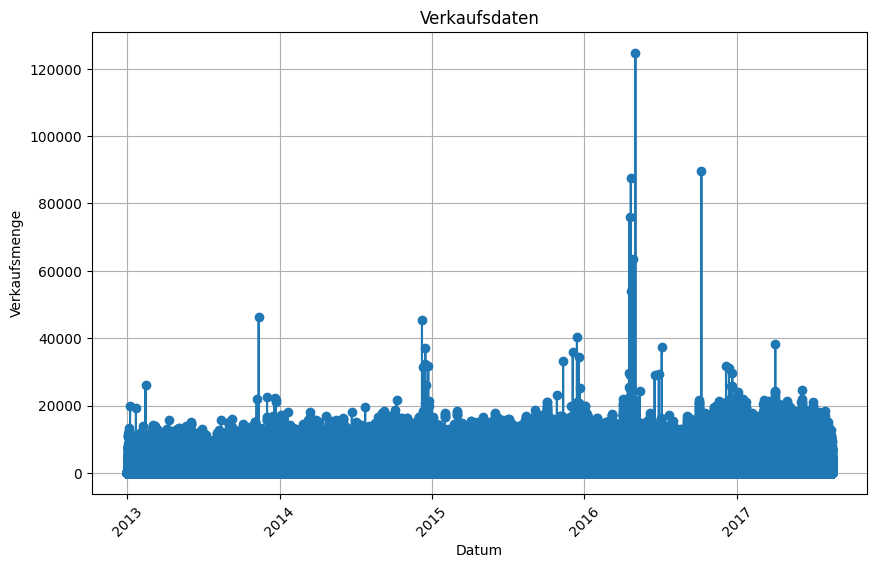

In [2]:
import matplotlib.pyplot as plt
# Spalten "sales" und "datum" extrahieren
sales = train['sales']
datum = train['date']
# Mit Matplotlib visualisieren
plt.figure(figsize=(10, 6))
plt.plot(datum, sales, marker='o', linestyle='-')
plt.title('Verkaufsdaten')
plt.xlabel('Datum')
plt.ylabel('Verkaufsmenge')
plt.xticks(rotation=45)  # rotate for readability 
plt.grid(True)
plt.show()

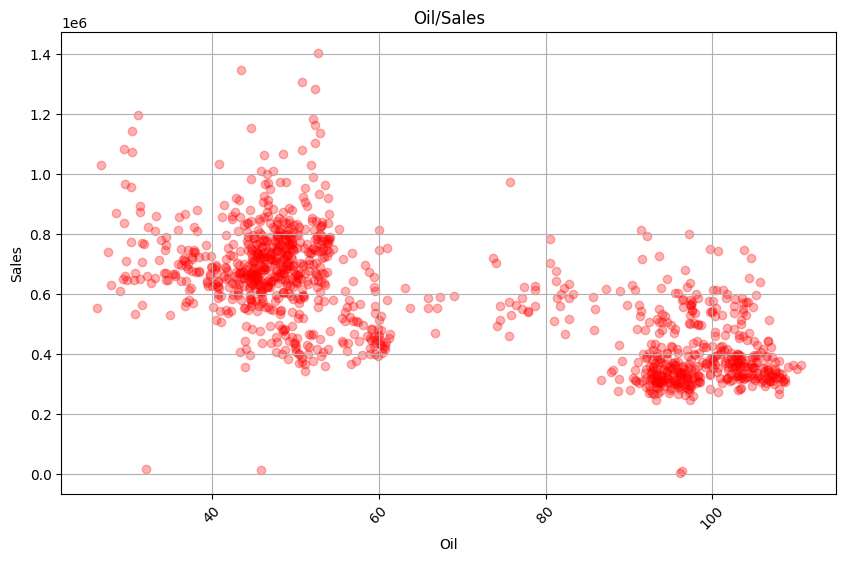

In [3]:

import matplotlib.pyplot as plt
# Spalten "sales" und "datum" extrahieren
train2 = train
grouped_df = train2.groupby('date')['sales'].sum().reset_index()
merged_df = pd.merge(grouped_df, oil, on='date', how='inner')
merged_df = merged_df.sort_values(by="date")
datum = merged_df["date"]
oil2 = merged_df["dcoilwtico"]
sales = merged_df["sales"]
sales = sales* 0.001*0.5*0.5*0.5+60


sales_s1 = merged_df["sales"].shift(1)
sales_s3 = merged_df["sales"].shift(3)
sales_s5 = merged_df["sales"].shift(5)
sales_s10 = merged_df["sales"].shift(10)
sales_s12 = merged_df["sales"].shift(12)
sales_s15 = merged_df["sales"].shift(15)
sales_s18 = merged_df["sales"].shift(18)

sales_s20 = merged_df["sales"].shift(20)

# Mit Matplotlib visualisieren
plt.figure(figsize=(10, 6))
#plt.scatter(oil2, sales_s18,marker='o', linestyle='-', color="blue", alpha=0.3)
#plt.scatter(oil2, sales_s3,marker='o', linestyle='-', color="green", alpha=0.3)
#plt.scatter(oil2, sales_s12,marker='o', linestyle='-', color="yellow", alpha=0.3)
plt.scatter(oil2, sales_s15,marker='o', linestyle='-', color="red", alpha=0.3)

#plt.plot(datum,oil2, marker='o', linestyle='-',color="red")
plt.title('Oil/Sales')
plt.xlabel('Oil')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Drehen der Datumsbeschriftungen für bessere Lesbarkeit
plt.grid(True)
plt.show()

        date          sales
0 2013-01-01    2511.618999
1 2013-01-02  496092.417944
2 2013-01-03  361461.231124
3 2013-01-04  354459.677093
4 2013-01-05  477350.121229
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
        date  sales  dcoilwtico
0 2013-01-01    NaN         NaN
1 2013-01-02    NaN       93.14
2 2013-01-03    NaN       92.97
3 2013-01-04    NaN       93.12
4 2013-01-07    NaN       93.20


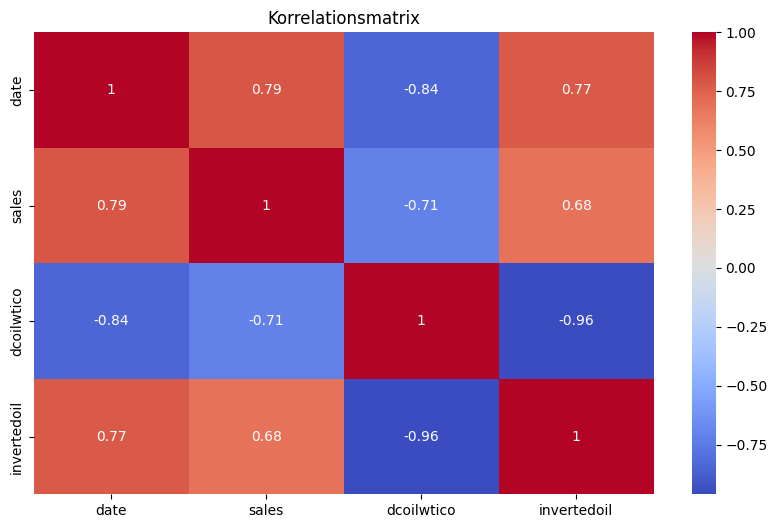

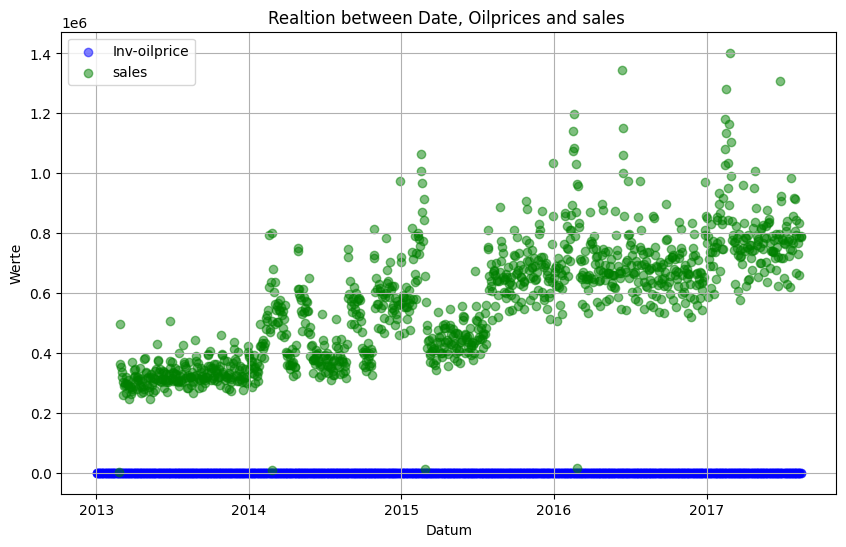

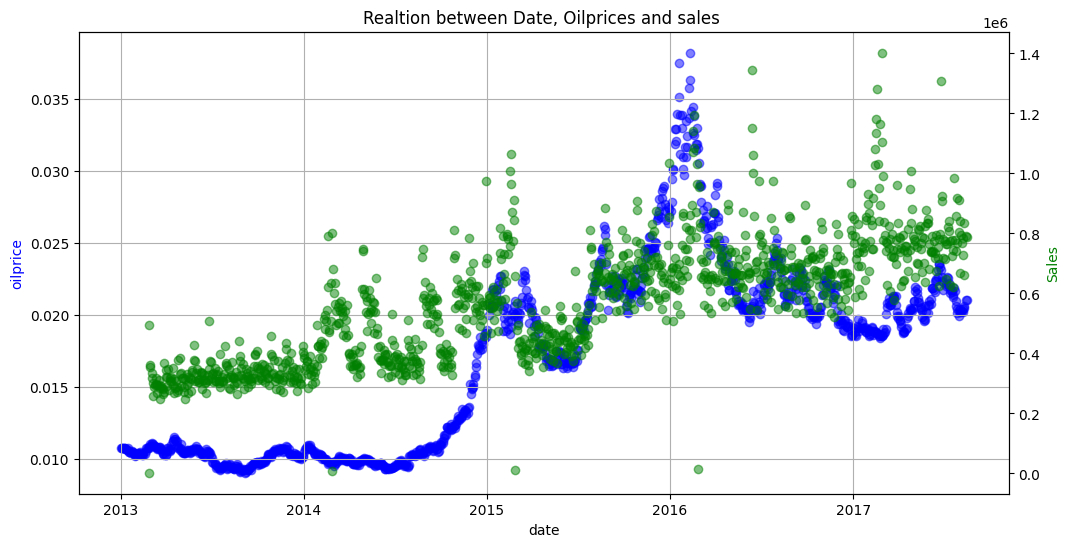

In [4]:
import seaborn as sns

salesByDate = train.groupby('date')['sales'].sum().reset_index()

print(salesByDate.head())
print(oil.head())

oil['date'] = pd.to_datetime(oil['date'])
    
merged = pd.merge(salesByDate, oil, on="date", how="inner")
merged['sales'] = merged['sales'].shift(40)

# mergedWithoutDate = pd.drop

print(merged.head())

merged['invertedoil'] = 1 / merged['dcoilwtico']

correlMatrix = merged.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlMatrix, annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# Erstellen Sie ein Streudiagramm
plt.figure(figsize=(10, 6))
plt.scatter(merged['date'], merged['dcoilwtico'], label='Inv-oilprice', color='blue', alpha=0.5)
plt.scatter(merged['date'], merged['sales'], label='sales', color='green', alpha=0.5)
plt.xlabel('Datum')
plt.ylabel('Werte')
plt.title("Realtion between Date, Oilprices and sales ")
plt.legend()
plt.grid(True)

# Anzeige des Diagramms
plt.show()


# Erstellen Sie das erste Streudiagramm mit "Date" auf der X-Achse und "Oil_Price" auf der ersten Y-Achse
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.scatter(merged['date'], merged['invertedoil'], label='Ölpreis', color='blue', alpha=0.5)
ax1.set_xlabel('date')
ax1.set_ylabel('oilprice', color='blue')
ax1.grid(True)

# Erstellen Sie das zweite Streudiagramm mit "Date" auf der X-Achse und "Sales" auf der zweiten Y-Achse
ax2 = ax1.twinx()
ax2.scatter(merged['date'], merged['sales'], label='Sales', color='green', alpha=0.5)
ax2.set_ylabel('Sales', color='green')

# Anzeige des Diagramms
plt.title("Realtion between Date, Oilprices and sales ")
plt.show()

# 2. Further data refinement
We looked at ways on how to combine the different dataframes.  
Also we managed to encode the typ of shop and the family 

In [5]:
"""Read files"""
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

path = "/kaggle/input/store-sales-time-series-forecasting/"
holidays_events = pd.read_csv(path+ "holidays_events.csv") 
oil = pd.read_csv(path + "oil.csv")
stores = pd.read_csv(path + "stores.csv")
transactions = pd.read_csv(path + "transactions.csv")

test = pd.read_csv(path + "test.csv")
train = pd.read_csv(path + "train.csv")


le = LabelEncoder() 


"""umwandlung"""
train['date'] = pd.to_datetime(train['date'])
train = train.sort_values(by='date')

test['date'] = pd.to_datetime(test['date'])
test = test.sort_values(by='date')


oil["date"] = pd.to_datetime(oil["date"])


oil_and_train = pd.merge(train, oil, on='date', how='left')
oil_and_train["oil_15d"] = oil_and_train["dcoilwtico"].shift(-15)
oil_and_train = oil_and_train.dropna() 
oil_and_train['family'] = le.fit_transform(oil_and_train['family'])

#### shifts
oil_and_train["sales"]

oil_and_test = pd.merge(test, oil, on='date', how='left')
oil_and_test["oil_15d"] = oil_and_test["dcoilwtico"].shift(-15)
oil_and_test['family'] = le.fit_transform(oil_and_test['family'])


oil_and_train['date'] = pd.to_datetime(oil_and_train['date'])
oil_and_train = oil_and_train.sort_values('date')
oil_and_train['Zeit'] = oil_and_train.groupby('date').ngroup()



oil_and_test['date'] = pd.to_datetime(oil_and_test['date'])
oil_and_test = oil_and_test.sort_values('date')
oil_and_test['Zeit'] = oil_and_test.groupby('date').ngroup()


#stores hinzufügen 
stores_and_train =pd.merge(oil_and_train, stores, on='store_nbr', how='left')
stores_and_test = pd.merge(oil_and_test,stores,on="store_nbr", how = "left")

stores_and_train["type"] = le.fit_transform(stores_and_train["type"])
stores_and_test["type"] = le.fit_transform(stores_and_test["type"])

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np 
def preprocess_data(train,test): 

    X = train.drop("sales", axis=1)
    y = train["sales"]
    
    X = X.head(100000)
    y = y.head(100000)
    
 


    
    
    mean_A = X['dcoilwtico'].mean()
    X['dcoilwtico'].fillna(mean_A, inplace=True)
    X = X.drop("date",axis=1)
    
    X = X.drop("city", axis=1)
    X = X.drop("state",axis=1)
    
    X_val = test

    X_val = X_val.drop("date",axis=1)
    X_val = X_val.drop("city", axis=1)
    X_val = X_val.drop("state",axis=1)
    
    
    mean_A = X_val['dcoilwtico'].mean()
    X_val['dcoilwtico'].fillna(mean_A, inplace=True)
    
    mean_A = X_val['oil_15d'].mean()
    X_val['oil_15d'].fillna(mean_A, inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test, X_val 

X_train, X_test, y_train, y_test, X_val  = preprocess_data(stores_and_train,stores_and_test)

# 3. Train a modell 
We have also tried to use LinearRegression and RandomForrest but the results from the Gradient Bossting were the best.  
In the plot it looks like its doint a good job on the training data, but on kaggle it had a bad score of 2.2 

We have also tried to use more LAAG features in a different notebook but that also didn't quite work. 
Especiall because we didn't had any experience with that kind of data. 
For example we didn't know what to do with missing values, in traditional regression we often use the mean valaue but in terms of TimeSeries
that doesn't make sense. 
Also it was new to us that we have to combine the training and test data to create LAAG features. 
Espacially if you want to use the LAAG feature Sales (one day in the past). You have to predict every time point seperately because 
you need the result for the next prediction 

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Beispiel-Daten laden oder erstellen (X_train, y_train)

# Hyperparameter-Raster erstellen
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=400, num=10)],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [1,2,3, 4, 5, 6, 7, 8],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Regressor-Modell erstellen
gb = GradientBoostingRegressor()

# RandomizedSearchCV-Objekt erstellen
random_search = RandomizedSearchCV(
    gb, param_distributions=param_grid, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Hyperparameter-Optimierung durchführen
random_search.fit(X_train, y_train)
train_pred = random_search.predict(X_train)
# Beste gefundene Hyperparameter anzeigen
best_params = random_search.best_params_
print("Beste gefundene Hyperparameter:", best_params)

# Beste gefundene Modellgenauigkeit anzeigen
best_score = random_search.best_score_
print("Beste gefundene R2-Score (Modellgenauigkeit):", best_score)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=96; total time=  19.2s
[CV] END learning_rate=0.5, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=270; total time=  33.3s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=96; total time=   5.1s
[CV] END learning_rate=0.3, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=96; total time=   5.5s
[CV] END learning_rate=0.3, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=96; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=270; total time

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt 

# Scatter-Plot erstellen
x_axis = []
for i in range(0,len(y_train)):
    x_axis.append(i)
    
start = 100 
end = 140 
x_axis = x_axis[start:end]
y_train2 = y_train[start:end]
train_pred2 = train_pred[start:end]
plt.scatter(x_axis,y_train2 , label='Punkte', color='b', marker='o', alpha=0.3)
plt.scatter(x_axis, train_pred2, color = "red" ,label="prediction", alpha=0.3)
# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.title('Einfacher Scatter-Plot')

# Legende hinzufügen
plt.legend()

# Scatter-Plot anzeigen
plt.show()

In [ ]:
def to_csv(data,model, name="gb"): 

    pred = model.predict(data)
    preds = []

    for e in pred:
        preds.append(round(e))
    ids = []
    for index, row in data.iterrows():
        for index, value in row.items():
            if(index == "id"):
                ids.append(int(value))



    df = pd.DataFrame({'id': ids,
                       'sales': preds})
    
    
    print(len(df))
    import os 
    if(not os.path.exists("./output")):
        os.makedirs("./output")
    df.to_csv("./output/"+name+".csv",index=False)
    
to_csv(X_val,random_search, "gradient boostiting with random search")

# 4. Find a better approach  
After that we searched for a better suited library.  
Our first library was darts, which we really liked. The only problem for us was that it wasn't quite suited because it works with TimeSeries and it wasn't easy to convert it back to our desired format. 
But in real life for a DataAnalyst this is a great tool for visualization and forecasts 

In [ ]:
"""Read files"""
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

path = "/kaggle/input/store-sales-time-series-forecasting/"
holidays_events = pd.read_csv(path+ "holidays_events.csv") 
oil = pd.read_csv(path + "oil.csv")
stores = pd.read_csv(path + "stores.csv")
transactions = pd.read_csv(path + "transactions.csv")

test = pd.read_csv(path + "test.csv")
train = pd.read_csv(path + "train.csv")

In [ ]:
%pip install darts >> /dev/null 

In [ ]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing, NaiveSeasonal
le = LabelEncoder() 
train2 = train 
train2['date'] = pd.to_datetime(train2['date'])
train2 = train2.sort_values(by='date')
train2['family'] = le.fit_transform(train2['family'])
train2 = train2.drop("id",axis=1)

In [ ]:
series = TimeSeries.from_group_dataframe(train2, value_cols="sales",time_col='date',group_cols=["store_nbr","family"],fill_missing_dates=True, freq=None)
series[500].plot() 

In [ ]:
from darts.models import RegressionEnsembleModel
from darts.models import NaiveEnsembleModel
from darts.models import NaiveDrift, NaiveSeasonal
from darts.utils.missing_values import fill_missing_values
from darts.metrics import mape
train_series = series[0]
train_series2 = series[1]

series_air = fill_missing_values(train_series)
series_air2 = fill_missing_values(train_series2)
models = [NaiveDrift(), NaiveSeasonal(12)]

ensemble_model = RegressionEnsembleModel(
    forecasting_models=models, regression_train_n_points=800
)

backtest = ensemble_model.historical_forecasts(
    [series_air, series_air2], start=0.2, forecast_horizon=1, verbose=True
)

#print("MAPE = %.2f" % (mape(backtest, series_air)))
series_air.plot()
series_air2.plot()

In [ ]:
series_air.plot()
series_air2.plot()
backtest[0].plot()
backtest[1].plot() 

# 5.1 Another approach 
We found another library "sktime" which is much easier to handle if we want to take part in the kaggle competition. 
With the Naive Forecaster we are able to produce a score of 0.48781 which is certainly not the best. But is a good start for trying out forecasting the first time. 

In [2]:
%pip install sktime >> /dev/null 
#%pip install pmdarima >> /dev/null 


Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install mlflow >> /dev/null 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 43.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.utils.plotting import plot_series

# 5.2 Read Data and Transform

We want to treat every store and every type differently 
We create a multiindex: 


store_nbr, family date | id, onpromotion (sales) 


In [4]:
path = "/kaggle/input/store-sales-time-series-forecasting/"
train_df = (
    pd.read_csv(
        path+"train.csv",
        parse_dates=["date"],
        dtype={
            "store_nbr": "category",
            "family": "category",
        }
    )
)
train_df['date'] = train_df.date.dt.to_period('D')
train_df = train_df.set_index(["store_nbr", "family", "date"]).sort_index() 


test_df = (
    pd.read_csv(
        "/kaggle/input/store-sales-time-series-forecasting/test.csv",
        parse_dates=["date"],
        dtype={
            "store_nbr": "category",
            "family": "category",
        }
    )
)
test_df['date'] = test_df.date.dt.to_period('D')
test_df = test_df.set_index(["store_nbr", "family", "date"]).sort_index() 


# 5.3 Visualize the data 

In [ ]:
train_df.head() 

In [ ]:
from sktime.utils.plotting import plot_series
            #storeid, type, date  
labels = ('7', "AUTOMOTIVE","2017")
data = train_df["sales"]
plot_series(
    data.loc[labels],
    labels=["predicted "]
)

In [ ]:
import matplotlib.pyplot as plt 
# Plot mit unterschiedlichen Farben für jede Gruppe
data = train_df.reset_index() 

plt.figure(figsize=(12, 6))
for group, group_data in data.groupby('store_nbr'):
    group_data['date'] = group_data['date'].dt.to_timestamp()
    plt.plot(group_data['date'], group_data['sales'], label=f'Group {group}')
    plt.fill_between(group_data['date'], group_data['sales'], color='none')  # Set color to 'none' for no fill


In [5]:
"""Create a forecasting horizon
Test: last 16 days of training
kaggle: predict the test data"""
Test = False 

y_train = train_df.loc[:, ["sales"]]
X_train = train_df.drop(["id", "sales"], axis=1)

if Test: 
    start_date = "2017-07-31"
    from sktime.forecasting.model_selection import temporal_train_test_split
    y_train_split, y_test_split = temporal_train_test_split(y_train)
else:
    start_date = "2017-08-16"
    y_train_split = y_train 
    
    
    
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range(start_date, periods=16, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
             '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
             '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
             '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
            dtype='period[D]', is_relative=False)

In [6]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(
    window_length=3 * 28, 
    strategy="mean",
    sp=15,
)




forecaster.fit(y = y_train_split, fh = fh)

NaiveForecaster(sp=15, strategy='mean', window_length=84)

In [8]:
import joblib
from sktime.utils import mlflow_sktime 
joblib.dump(forecaster, "/kaggle/working/naive_forecaster.pkl")
model_path = "/kaggle/working/model" 
mlflow_sktime.save_model(  
    sktime_model=forecaster,
    path=model_path)  


/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [22]:
y_pred = forecaster.predict(fh)


In [23]:
y_pred.head() 

sales
store_nbr family     date             
1         AUTOMOTIVE 2017-08-16    6.6
                     2017-08-17    3.4
                     2017-08-18    3.6
                     2017-08-19    4.4
                     2017-08-20    4.6

In [ ]:
from sktime.utils.plotting import plot_series
            #storeid, type, date  
labels = ('3', "AUTOMOTIVE","2017")

plot_series(
    y_train.loc[labels], 
    y_pred.loc[labels],
    labels=["predicted ", "train"]
)

In [ ]:
from sktime.utils.plotting import plot_series
            #storeid, type, date  
labels = ('1', "BOOKS","2017")

plot_series(
    y_train.loc[labels], 
    y_pred.loc[labels],
    labels=["predicted ", "train"]
)

In [ ]:
def to_csv(data,pred, filepath="submission.csv"):
    (data.loc[:, ["id"]]
                .assign(sales=pred)
                .reset_index(drop=True)
                .set_index("id")
                .sort_index()
                .to_csv(filepath, index=True))

In [ ]:
to_csv(test_df, y_pred)